In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [18]:
figsize = (15, 6)

train_dataset = datasets.FashionMNIST(root='./data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_dataset = datasets.FashionMNIST(root='./data',
                                  train=False,
                                  transform=transforms.ToTensor())

In [19]:
len(train_dataset)

60000

In [20]:
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Label is:  0


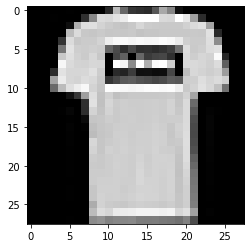

In [21]:
#Sample of a shirt
sample = 1
image = train_dataset[sample][0].numpy().reshape(28, 28)
label = train_dataset[sample][1]
print("Label is: ", label)
plt.imshow(image, cmap = 'gray')

Label is:  5


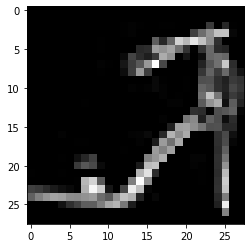

In [22]:
#Sample of a ankle boot
sample = 8
image = train_dataset[sample][0].numpy().reshape(28, 28)
label = train_dataset[sample][1]
print("Label is: ", label)
plt.imshow(image, cmap = 'gray')

In [23]:
#pixel vals in an image
min_value = train_dataset[sample][0].min()
max_value = train_dataset[sample][0].max()
print("Min Pixel Value: ", min_value)
print("Max Pixel Value: ", max_value)

Min Pixel Value:  tensor(0.)
Max Pixel Value:  tensor(1.)


Text(0.5, 1.0, 'Sigmoid Function')

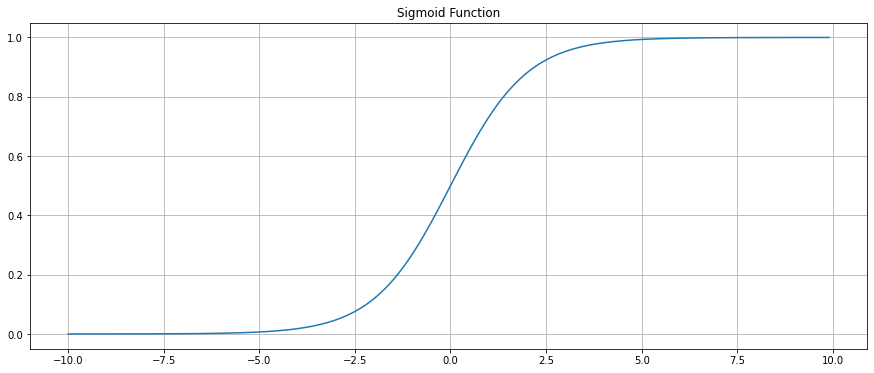

In [24]:
# here we will use an activation called sigmoid

x = torch.arange(-10., 10., 0.1)
plt.figure(figsize=figsize);
plt.plot(x.numpy(), torch.sigmoid(x).numpy())
plt.grid('on')
plt.title('Sigmoid Function')

In [25]:
class FCAutoEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        # Encoder: affine function  (wx + b)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Decoder: affine function
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Encoder: affine function
        out = self.fc1(x)
        # Encoder: non-linear function
        out = F.leaky_relu(out)

        # Decoder: affine function
        out = self.fc2(out)
        # Decoder: non-linear function
        out = torch.sigmoid(out)
        
        return out

In [26]:
#in overcomplete AE, we force the hidden layer to pick important features since some of the ip nodes which are noised here are useless to copy info from

input_dim = 28 * 28
hidden_dim = int(input_dim * 1.5)
output_dim = input_dim

model = FCAutoEncoder(input_dim, hidden_dim, output_dim)

In [27]:
criterion = nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [28]:
num_params = len(list(model.parameters()))
for ii in range(num_params):
  print(list(model.parameters())[ii].size())

torch.Size([1176, 784])
torch.Size([1176])
torch.Size([784, 1176])
torch.Size([784])


In [29]:
idx = 0

dropout = nn.Dropout(0.5)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.view(-1, 28 * 28).requires_grad_()
    noisy_images = dropout(torch.ones(images.shape)) * images
    outputs = model(noisy_images)
    loss = criterion(outputs, images)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    idx += 1

    if idx % 500 == 0:
      total_test_loss = 0
      num_samples = 0

      for images, labels in test_loader:
        images = images.view(-1, 28 * 28)
        noisy_images = dropout(torch.ones(images.shape)) * images
        outputs = model(noisy_images)
        test_loss = criterion(outputs, images)
        num_samples += labels.size(0)
        total_test_loss += test_loss

      mean_test_loss = total_test_loss / num_samples

      print(f"Iteration: {idx}. Avg Test Loss: {mean_test_loss.item()}.")  

Iteration: 500. Avg Test Loss: 0.00016223853162955493.
Iteration: 1000. Avg Test Loss: 0.00014016730710864067.
Iteration: 1500. Avg Test Loss: 0.00013124530960340053.
Iteration: 2000. Avg Test Loss: 0.00012463501479942352.
Iteration: 2500. Avg Test Loss: 0.00012076007988071069.
Iteration: 3000. Avg Test Loss: 0.00011739446927094832.
Iteration: 3500. Avg Test Loss: 0.00011651884415186942.
Iteration: 4000. Avg Test Loss: 0.00011389394785510376.
Iteration: 4500. Avg Test Loss: 0.00011288592941127717.


Label: 5


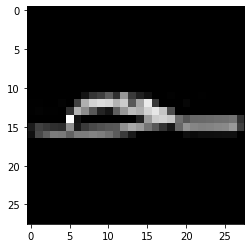

In [31]:
sample = 8
raw_image = test_dataset[sample][0]
final_image = raw_image.numpy().reshape(28, 28)
label = test_dataset[sample][1]
print(f"Label: {label}")
plt.imshow(final_image, cmap = 'gray');

Label: 5


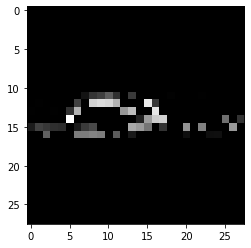

In [32]:
sample = 8
raw_image = test_dataset[sample][0]
noised_image = dropout(torch.ones(raw_image.shape)) * raw_image
final_image = noised_image.numpy().reshape(28, 28)
label = test_dataset[sample][1]
print(f"Label: {label}")
plt.imshow(final_image, cmap = 'gray');

Label: 5


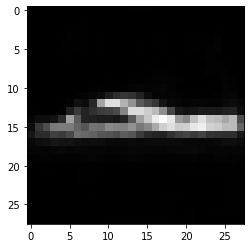

In [35]:
sample = 8
raw_image = test_dataset[sample][0]
raw_image = raw_image.view(-1, 28 * 28)
noised_image = dropout(torch.ones(raw_image.shape)) * raw_image
output_image = model(noised_image)
final_image = output_image.detach().numpy().reshape(28, 28)
label = test_dataset[sample][1]
print(f"Label: {label}")
plt.imshow(final_image, cmap = 'gray');